In [1]:
%matplotlib inline
from neurotools.nlab import *

Loading nlab namespace
<function decorator at 0x7f8582f6cae8>


# Rectangular coordinates first

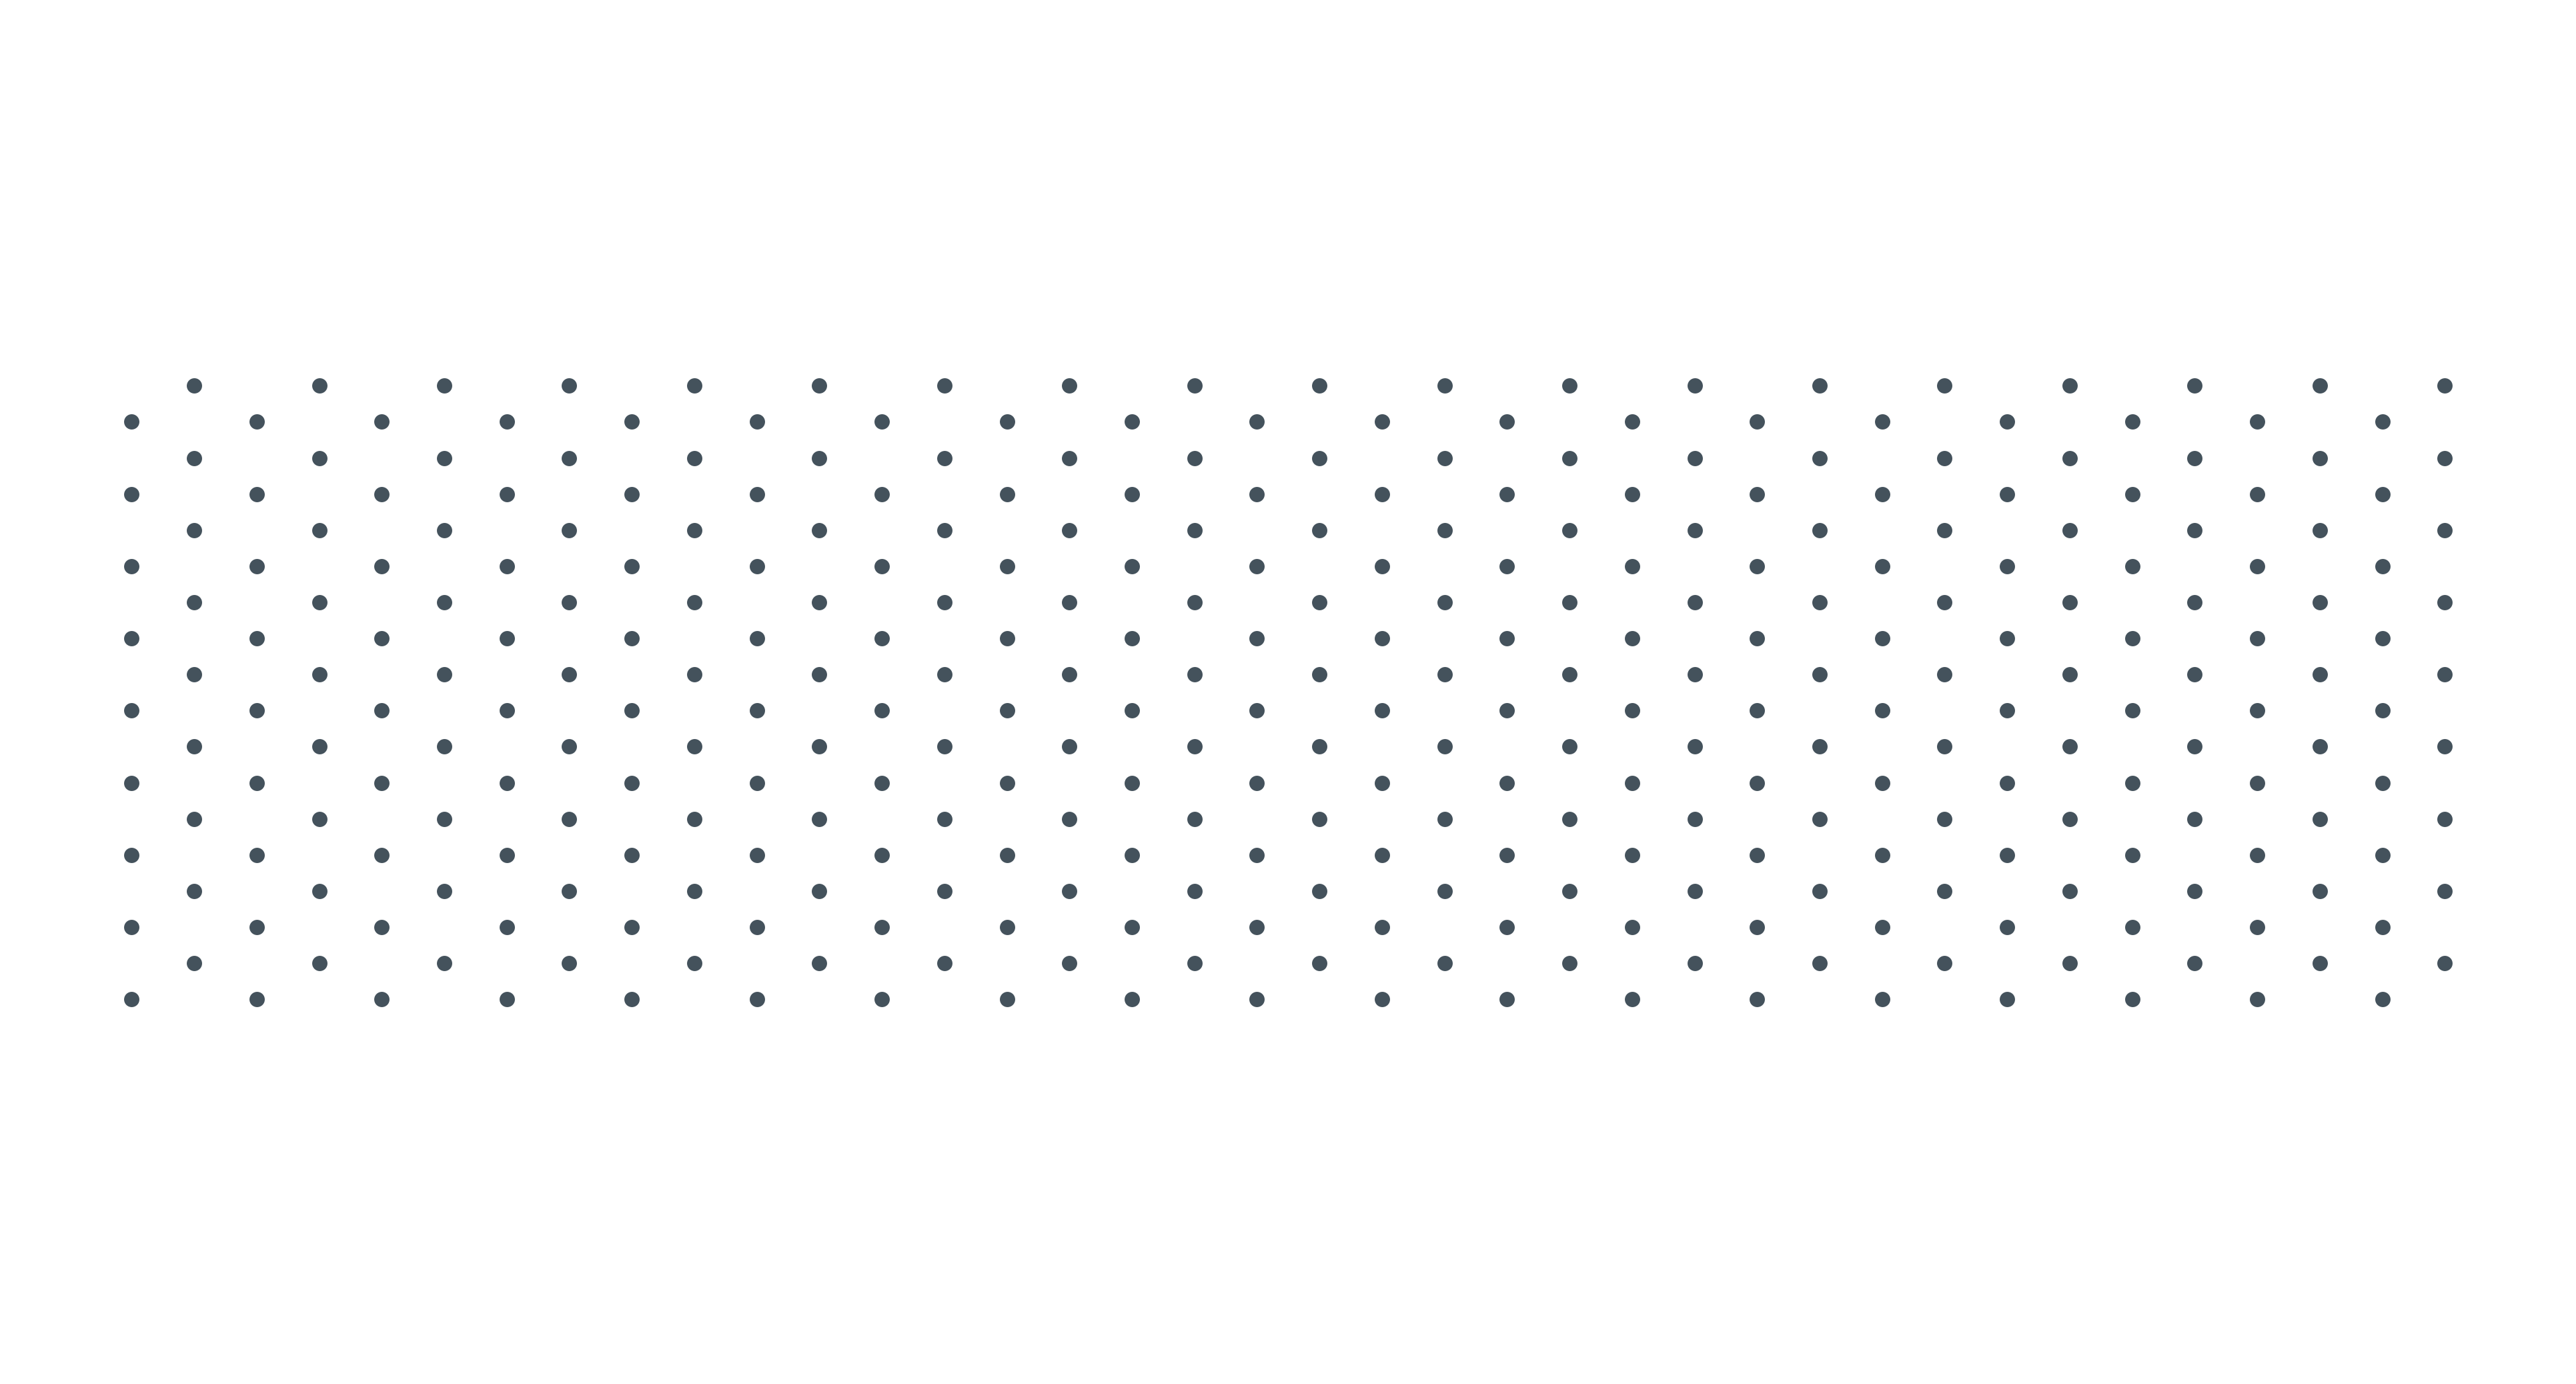

In [2]:
N = 19
M = N*(N-1)
cols = N-1
rows = N

figure(figsize=(rows*sqrt(3),cols),dpi=150)

for c in range(cols):
    x = arange(rows)*sqrt(3) + (sqrt(3)*0.5)*(c%2)
    y = ones(rows)*c*0.5
    scatter(x,y,s=100,color=BLACK)
    
axis('equal')
noxyaxes()

# Polar

In [3]:
# Golden ratio
phi = (sqrt(5)-1)/2
print(phi)

0.6180339887498949


0.9563236585434998


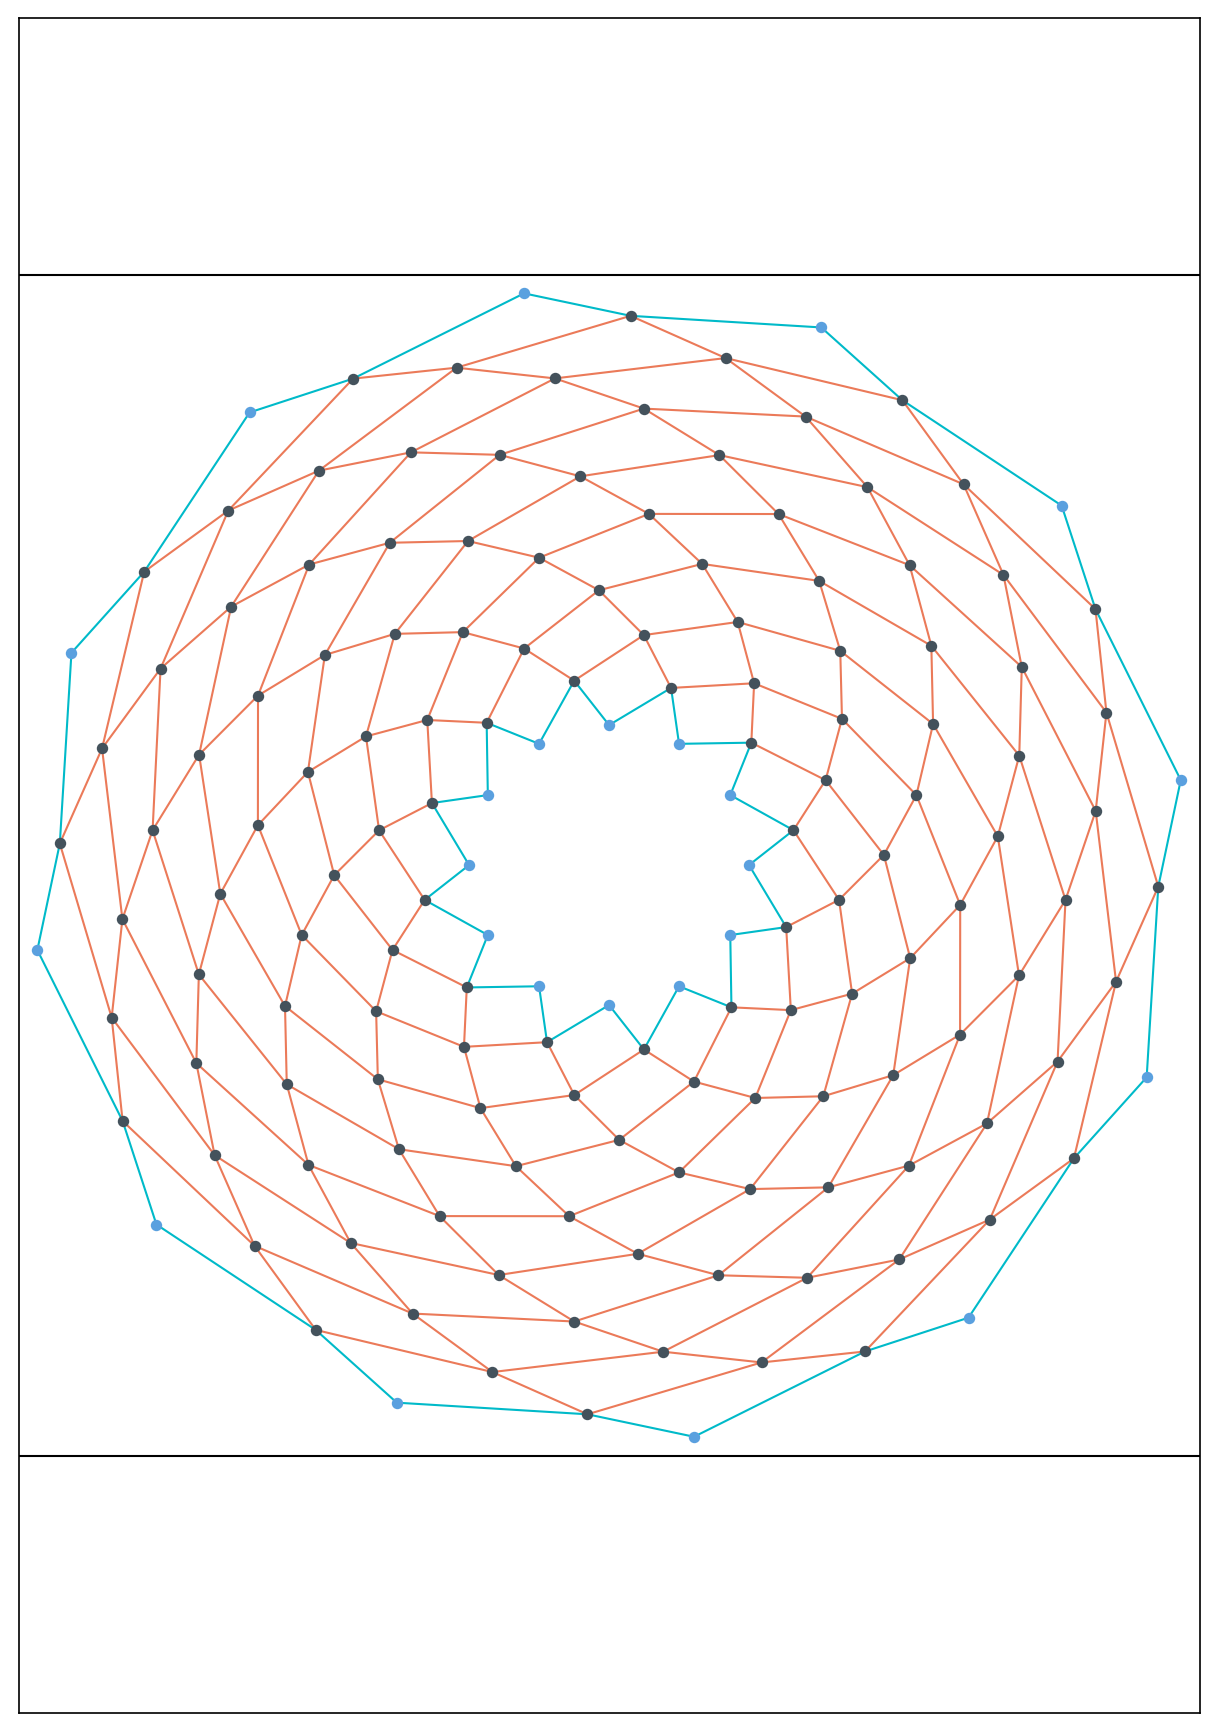

In [4]:
A4mm = array([210,297])
mmperinch = 25.4
size_in = A4mm/mmperinch
marginmm = 5
marginin = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
pagecenter = axissizecm/2
scale = 13

N = 12
M = N*(N-1)
cols = N-1+2
rows = N

figure(figsize=size_in,dpi=150)
mx,my = marginfraction
subplots_adjust(mx,my,1-mx,1-my,0,0)

vertices= []
edges   = []

for c in range(cols):
    x = arange(rows)*sqrt(3)# + (sqrt(3)*0.5)*(c%2)
    x += c*phi
    y = ones(rows)*c*0.5
    # polar transform
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    # Adjustment
    x,y = c2p(log(1+r+0.2)*exp(1j*theta))
    vv = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)*scale + pagecenter
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path).T
plot(*path.T[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*path.T[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*path.T[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vertices[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vertices[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vertices[-rows:].T,s=20,color=AZURE,zorder=10)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
axhline((axissizecm[1]-axissizecm[0])/2,color='k',lw=1)
axhline(axissizecm[1]-(axissizecm[1]-axissizecm[0])/2,color='k',lw=1)

#axis('equal')
#noxyaxes()
xticks([])
yticks([])
savefigure('Sunflower2')

# If using 9mm beads, probably want at least 9+3=12 mm length at minimum
# Could use 6mm+3mm = 9mm minimum if have 6mm beads
lens = abs(p2c(diff((vertices)[edges],axis=1).squeeze().T))
print(np.min(lens))

# Split over 2 A4 sheets

15.853352560442314


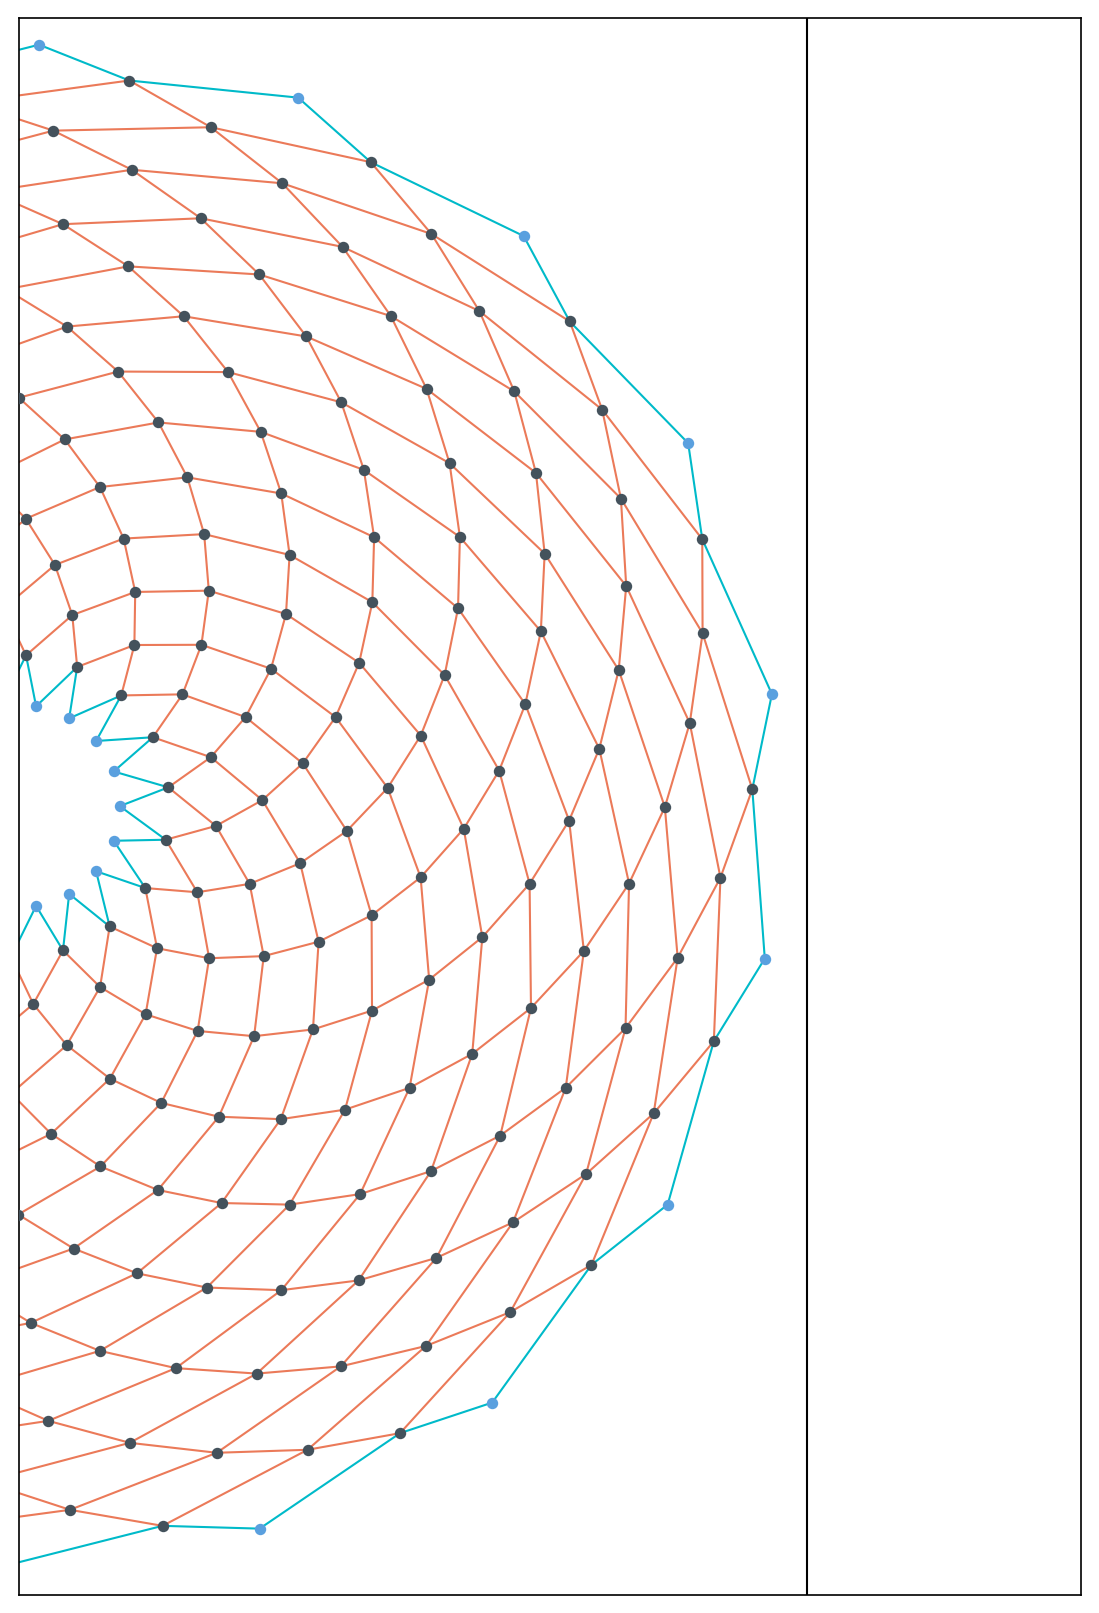

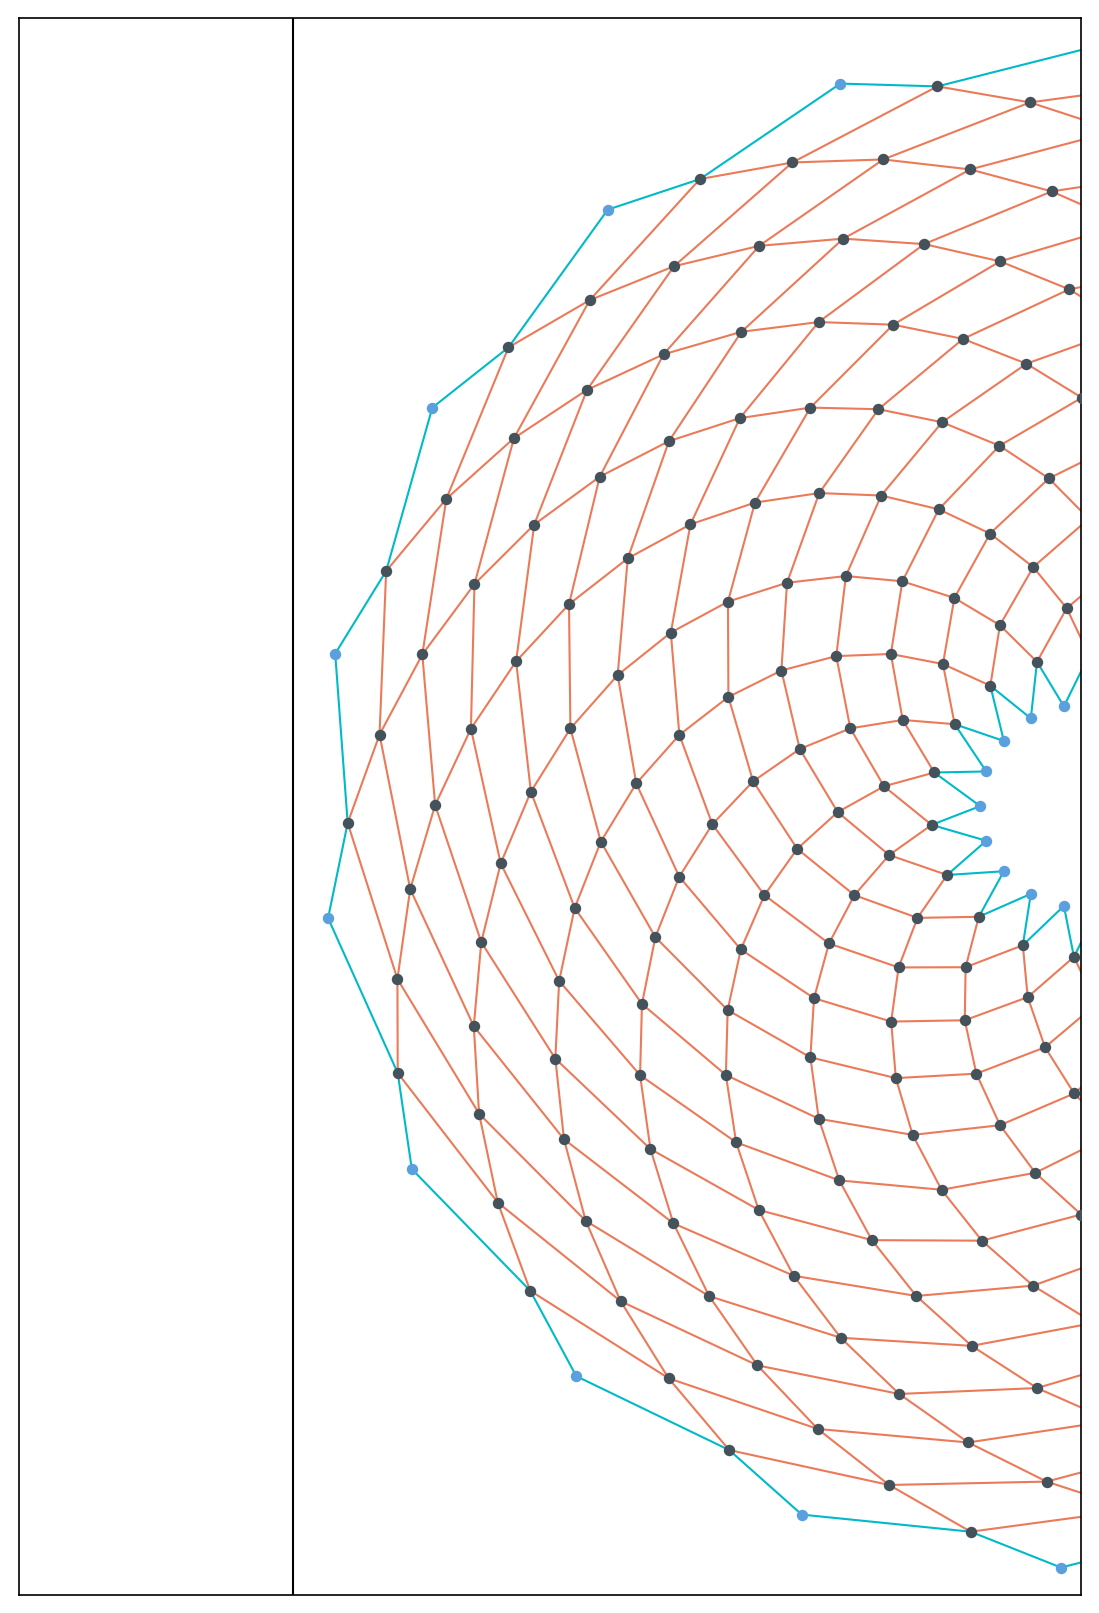

In [13]:
A4mm      = array([210,297])
mmperinch = 25.4
size_in   = A4mm/mmperinch
marginmm  = 15
marginin  = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
scale      = 18
mx,my      = marginfraction

N = 18
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []
for c in range(cols):
    x = arange(rows)*sqrt(3)+c*phi
    y = ones(rows)*c*0.5
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    x,y = c2p(log(1+r+0.1)*exp(1j*theta))
    vv  = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path)

# Right half
pagecenter = array([0,axissizecm[1]/2])
figure(figsize=size_in,dpi=150)
subplots_adjust(mx,my,1-mx,1-my,0,0)
pp = path    *scale + pagecenter
vv = vertices*scale + pagecenter
axvline(axissizecm[1]/2,color='k',lw=1)
plot(*pp[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*pp[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*pp[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vv[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vv[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vv[-rows:].T,s=20,color=AZURE,zorder=10)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
xticks([])
yticks([])
savefigure('Sunflower_right')

# Left Half
pagecenter = array([axissizecm[0],axissizecm[1]/2])
figure(figsize=size_in,dpi=150)
subplots_adjust(mx,my,1-mx,1-my,0,0)
pp = path    *scale + pagecenter
vv = vertices*scale + pagecenter
plot(*pp[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*pp[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*pp[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vv[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vv[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vv[-rows:].T,s=20,color=AZURE,zorder=10)
axvline(axissizecm[0]-axissizecm[1]/2,color='k',lw=1)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
xticks([])
yticks([])
savefigure('Sunflower_left')

lens = abs(p2c(diff((vv*scale)[edges],axis=1).squeeze().T))
print(np.min(lens))

In [6]:

np.min(vv[1])+10

24.18652448654175

In [7]:
18*17

306

# Figure illustration

0.9980250337426722


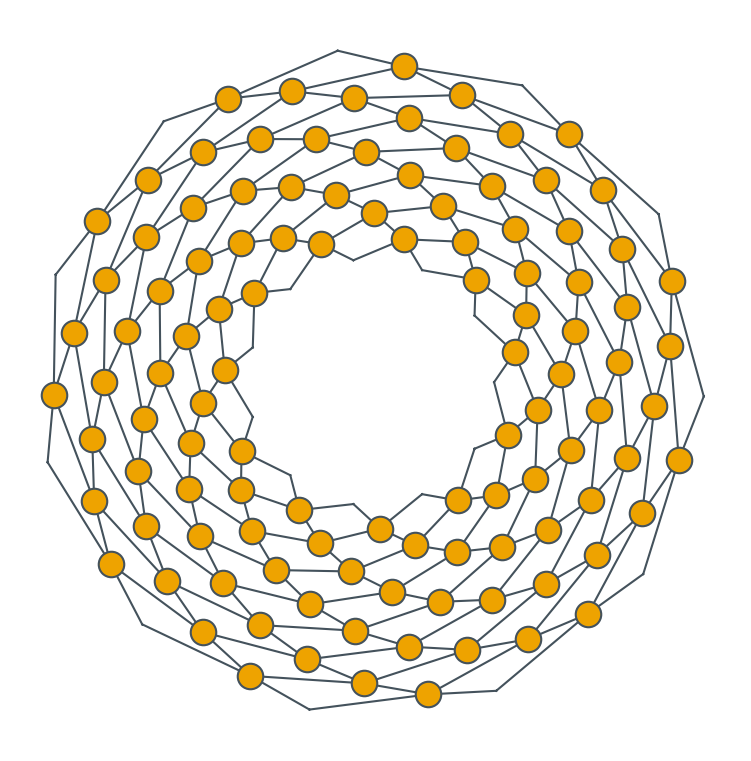

In [8]:
A4mm = array([210,297])
mmperinch = 25.4
size_in = A4mm/mmperinch
marginmm = 5
marginin = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
pagecenter = axissizecm/2
scale = 13


N = 11
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []

for c in range(cols):
    x = arange(rows)*sqrt(3)# + (sqrt(3)*0.5)*(c%2)
    x += c*phi
    y = ones(rows)*c*0.5
    # polar transform
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    # Adjustment
    x,y = c2p(log(1+r*0.8+0.3)*exp(1j*theta))
    vv = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)*scale + pagecenter
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path).T
linecolor=BLACK



figure(figsize=(5,5),dpi=150)
mx,my = marginfraction
subplots_adjust(mx,my,1-mx,1-my,0,0)

plot(*path.T[rows*3*2:-rows*3*2].T,lw=1,color=linecolor)
plot(*path.T[:rows*3*2].T,lw=1,color =linecolor)
plot(*path.T[-rows*3*2:].T,lw=1,color=linecolor)
size = 150
facecolor=OCHRE
edgecolor=BLACK
scatter(*vertices[rows:-rows].T,color=BLACK,zorder=10,s=size,facecolor=facecolor,edgecolor=edgecolor)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])

noxyaxes()
axis('equal')
savefigure('Sunflower_illustration')

# If using 9mm beads, probably want at least 9+3=12 mm length at minimum
# Could use 6mm+3mm = 9mm minimum if have 6mm beads
lens = abs(p2c(diff((vertices)[edges],axis=1).squeeze().T))
print(np.min(lens))

# Cylindrical coordinates

In [9]:
1-(1-OCHRE)*z

array([[0.94228   , 0.81480941, 0.37629998],
       [0.94215333, 0.81491764, 0.38270003],
       [0.94203333, 0.81498981, 0.38910002],
       [0.94193333, 0.81502587, 0.3955    ],
       [0.94184   , 0.81502587, 0.40200001],
       [0.94176   , 0.81498981, 0.4084    ],
       [0.94168667, 0.81495373, 0.41469997],
       [0.94162667, 0.81488156, 0.42110002],
       [0.94158   , 0.81477333, 0.42750001],
       [0.94154   , 0.81462901, 0.43379998],
       [0.94151333, 0.81444863, 0.44010001],
       [0.9415    , 0.81426823, 0.44630003],
       [0.94149333, 0.81401568, 0.45249999],
       [0.94149333, 0.81376314, 0.4587    ],
       [0.94151333, 0.8134745 , 0.46490002],
       [0.94153334, 0.81318589, 0.47100002],
       [0.94157333, 0.81282509, 0.477     ],
       [0.94162   , 0.81246431, 0.48299998],
       [0.94167333, 0.81206745, 0.48900002],
       [0.94174   , 0.81167058, 0.49489999],
       [0.94181333, 0.81123766, 0.5007    ],
       [0.9419    , 0.81076862, 0.50639999],
       [0.

In [10]:
rmatrix(0.4)

array([[ 0.92106099,  0.38941834],
       [-0.38941834,  0.92106099]])

1.022458688411772


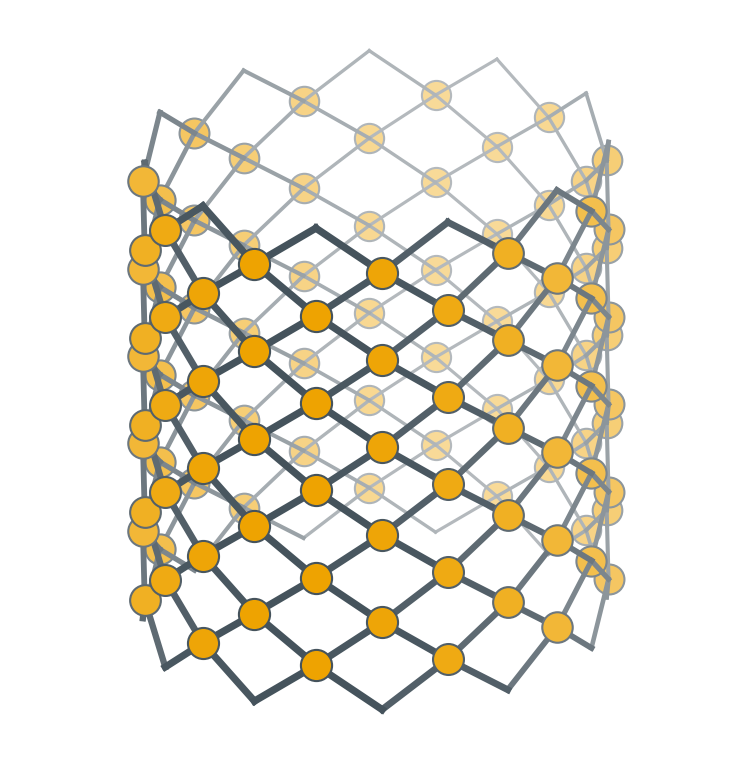

In [11]:
A4mm = array([210,297])
mmperinch = 25.4
size_in = A4mm/mmperinch
marginmm = 5
marginin = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
pagecenter = axissizecm/2
scale = 13


N = 11
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []

projection = array([
    [0.92,0.39,0],
    [.3*-.39,0.4*.91,sqrt(5)],
    [0,-1,0],
])

figure(figsize=(5,5),dpi=150)
mx,my = marginfraction
subplots_adjust(mx,my,1-mx,1-my,0,0)

for c in range(cols):
    x = arange(rows)*sqrt(3) + (sqrt(3)*0.5)*(c%2)
    #x += c*phi
    y = ones(rows)*c*0.5
    # polar transform
    #theta = x/(rows*sqrt(3))*2*pi
    #r     = y/cols*2
    # Adjustment
    #x,y = c2p(log(1+r*0.8+0.3)*exp(1j*theta))
    # Cylindrical
    R = 1
    theta = x/(rows*sqrt(3))*2*pi
    z = y/cols*2
    # Convert to 3D x y z
    x,y = c2p(R*exp(1j*theta))
    # Project
    x,y,z = projection@[x,y,z]
    vv = array(list(zip(x,y)))
    XYZ = array(list(zip(x,y,z)))
    if c>0 and c<N:
        for x,y,z in XYZ:
            x,y = array([x,y])*scale + pagecenter
            fade = (((z+1)*0.5)*0.6+0.4)
            scatter([x],[y],
                    s=70*(z*0.2+3),
                    facecolor=1-(1-OCHRE)*fade,
                    zorder=z*100,
                    edgecolor=1-(1-BLACK)*fade)
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-(c%2)*2+1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)
        # Plot it
        for e1,e2 in ee:
            v1 = XYZ[e2-vi0]
            v2 = vertices[e1]
            x1,y1,z = v1
            x2,y2 = v2
            
            x1,y1 = array([x1,y1])*scale + pagecenter
            x2,y2 = array([x2,y2])*scale + pagecenter
            fade = (((z+1)*0.5)*0.6+0.4)
            plot([x1,x2],[y1,y2],
                 lw=(z+2.5),
                 zorder=z*50,
                 color=1-(1-BLACK)*fade)
            

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)*scale + pagecenter
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path).T
linecolor=BLACK

#plot(*path.T[rows*3*2:-rows*3*2].T,lw=1,color=linecolor)
#plot(*path.T[:rows*3*2].T,lw=1,color =linecolor)
#plot(*path.T[-rows*3*2:].T,lw=1,color=linecolor)
size = 50
facecolor=OCHRE
edgecolor=BLACK
#scatter(*vertices[rows:-rows].T,color=BLACK,zorder=10,s=size,facecolor=facecolor,edgecolor=edgecolor)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])

noxyaxes()
axis('equal')
savefigure('Sunflower_illustration_cylinder')

# If using 9mm beads, probably want at least 9+3=12 mm length at minimum
# Could use 6mm+3mm = 9mm minimum if have 6mm beads
lens = abs(p2c(diff((vertices)[edges],axis=1).squeeze().T))
print(np.min(lens))